# Declaration of Originality

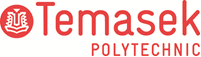

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Muhammad Amirul Irfan Bin Jamal (2404942A)
* Tutorial Group                : P04
* Tutor						    : Mr Emille
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding

Business problem context:

Pricing a used car is often inconsistent and time-consuming because the final selling price depends on many interacting factors such as brand/model popularity, model year, mileage, fuel type, engine specifications, transmission, accident history, and title status. Buyers may overpay if they lack market knowledge, while sellers may underprice or overprice which leads to longer listing times and lesser inquries. A data driven price estimator can improve transparency and decision-making for both buyers and sellers.

Project objective:

The objective of this project is to build a supervised machine learning model that predicts the used car price based on listing attributes. This model will be deployed through a Streamlit web application that allows users to input vehicle details and receive a predicted price. This simulates a realistic business feature such as a price recommendation tool commonly used by car marketplaces and dealerships.

Target users / stakeholders:

- Buyers: estimate whether a listing is fairly priced before purchasing
- Sellers / dealers: set a competitive listing price to improve sales likelihood
- Marketplace platform: improve listing quality and user trust through price guidance

# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "used_cars.csv"
df = pd.read_csv(FILE_PATH)
df ## Display dataframe

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


## 2.2 Summary Statistics

In [4]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
## Check for missing data
df.isna().sum() ## alternativeL df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [6]:
## Describe data distribution
df.describe(include="all")

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
display(df.isna().sum().sort_values(ascending=False))

clean_title     596
fuel_type       170
accident        113
brand             0
model             0
model_year        0
milage            0
engine            0
transmission      0
ext_col           0
int_col           0
price             0
dtype: int64

In [8]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

# Numeric summary
display(df[num_cols].describe())

# Categorical summary (top categories preview)
display(df[cat_cols].describe(include="object"))


Numeric columns: ['model_year']
Categorical columns: ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']


,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,16,3309,52,1037,905,2025,2910,3413,39


I did this to separate the numeric and categorical summaries so that it makes it easier to interpret the dataset.  Numeric columns show ranges (min/max) and central tendency (mean/median), while categorical columns show the number of unique categories and the most frequent values. This helps me to decide what preprocessing is needed.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [9]:
df["price"].head(10)


0    $10,300
1    $38,005
2    $54,598
3    $15,500
4    $34,999
5    $14,798
6    $31,000
7     $7,300
8    $41,927
9    $69,950
Name: price, dtype: object

I previewed the price column to confirm its raw format. Since the prices contain symbols/commas (stored as text), the values must be cleaned into numeric form before I can plot a meaningful price distribution or train regression models.

In [10]:
df["price"].dtype

dtype('O')

I did this to check the data type of price to confirm whether it is numeric or text. This helps to justify the need for data cleaning before performing target distribution analysis and model training.

### 2.3.1.2 Understanding distribution of features

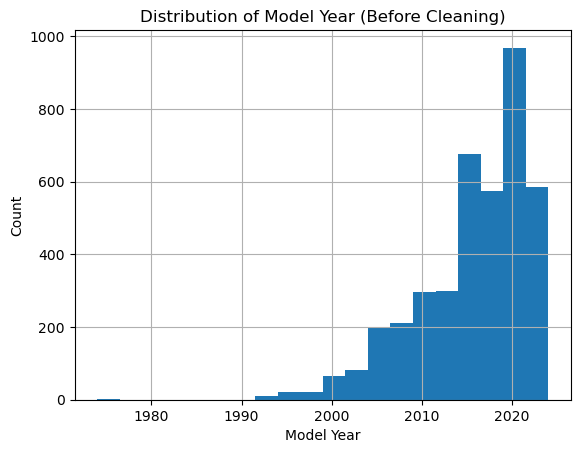

In [11]:
## Understanding distribution of target
## Model year distribution
plt.figure()
df["model_year"].hist(bins=20)
plt.title("Distribution of Model Year (Before Cleaning)")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.show()

This plot shows the spread of car ages in the dataset and which years are most common. Model year is usually a strong predictor of price, so this helps confirm the dataset contains a reasonable range of vehicle ages and alerts me to any unusual values.

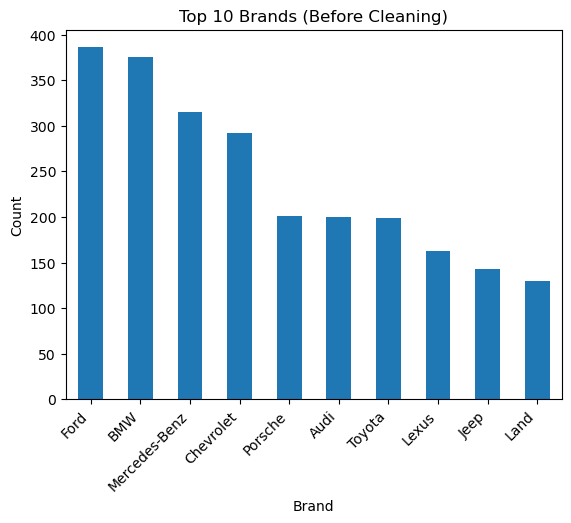

In [12]:
## Understanding distribution of features
## Top 10 brands
top_brands = df["brand"].value_counts().head(10)

plt.figure()
top_brands.plot(kind="bar")
plt.title("Top 10 Brands (Before Cleaning)")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()



This shows which brands dominate the dataset. This matters because the model may learn better for brands with more examples and perform worse for rare brands. It also helps plan the Streamlit dropdown choices (common brands will appear more often).

In [13]:
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_count / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
})

display(missing_table[missing_table["missing_count"] > 0])


,missing_count,missing_pct
clean_title,596,14.87
fuel_type,170,4.24
accident,113,2.82


I did this step to help me identify which columns have missing data and how severe it is.

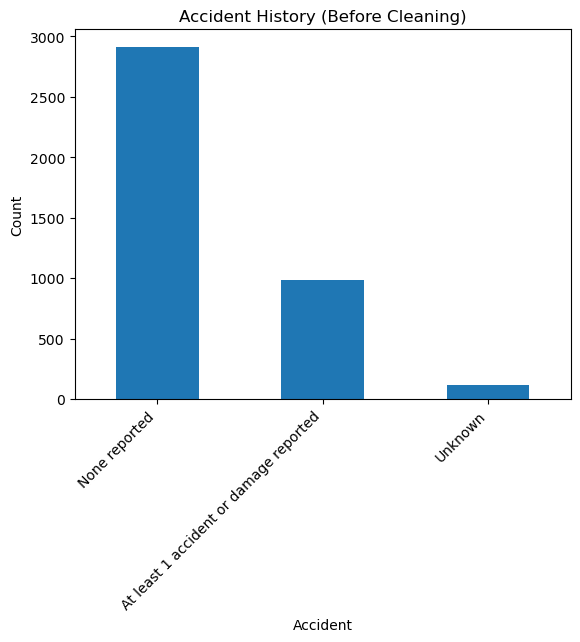

In [14]:
plt.figure()
df["accident"].fillna("Unknown").value_counts().plot(kind="bar")
plt.title("Accident History (Before Cleaning)")
plt.xlabel("Accident")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

Accident history is a real-world factor that can strongly affect resale value. This plot shows how common accident-related records are and whether the column is imbalanced. This helps decide whether the feature is useful and how to treat missing values later.

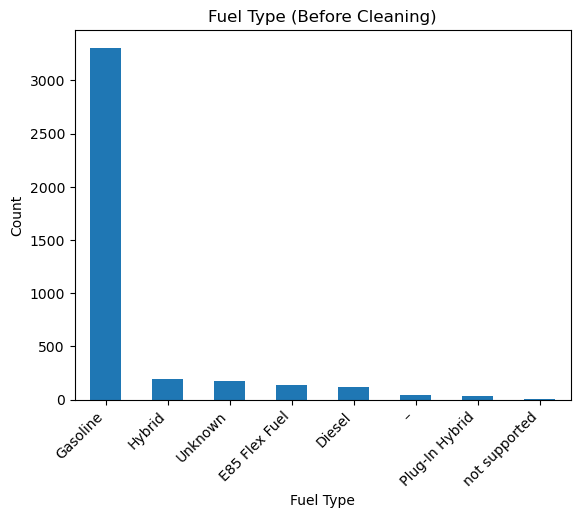

In [15]:
plt.figure()
df["fuel_type"].fillna("Unknown").value_counts().head(10).plot(kind="bar")
plt.title("Fuel Type (Before Cleaning)")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

Fuel type affects price like running costs, demand, and technology. This plot shows the most common fuel categories and whether there are many rare categories. It also confirms this is a categorical feature that will need encoding later.

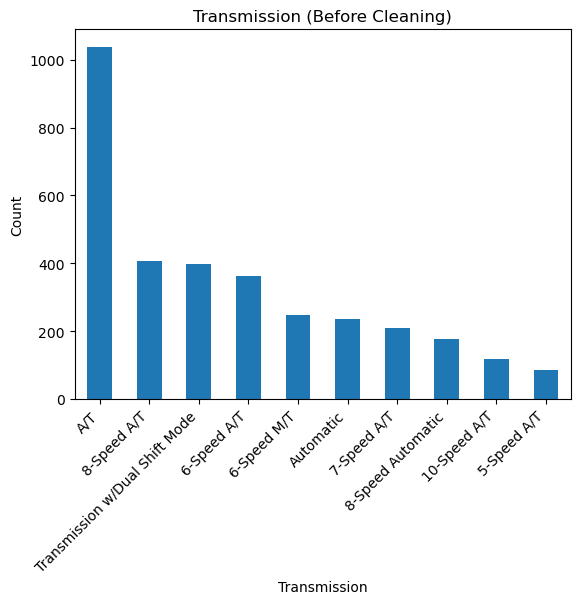

In [16]:
plt.figure()
df["transmission"].fillna("Unknown").value_counts().head(10).plot(kind="bar")
plt.title("Transmission (Before Cleaning)")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

Transmission type can influence price and buyer preference. This helps me see if there are too many unique transmission labels (which can increase the number of encoded features later). If labels are very messy, I may need to standardise or group them.

### 2.3.2 Understanding relationship between variables

In [17]:
## Understanding relationship between variables
df[["model_year", "price"]].head(10)


,model_year,price
0,2013,"$10,300"
1,2021,"$38,005"
2,2022,"$54,598"
3,2015,"$15,500"
4,2021,"$34,999"
5,2016,"$14,798"
6,2017,"$31,000"
7,2001,"$7,300"
8,2021,"$41,927"
9,2020,"$69,950"


I previewed model_year together with price to check whether both columns are present and to understand the raw format of the target when paired with an important feature. This prepares for relationship analysis after converting price into numeric form.

# 3. Data Preparation

## 3.1 Data Cleaning

### 3.1.1 Make a copy for before/after comparison

In [18]:
df_raw = df.copy()
df_raw.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"


I created a copy of the raw dataset so I can compare the dataset before and after cleaning. This helps me demonstrate the impact of cleaning steps clearly and provides evidence that cleaning was necessary.

### 3.1.2 Clean price into numeric

In [25]:
## Clean data
df["price"] = (
    df["price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

df[["price"]].head(3)

,price
0,10300.0
1,38005.0
2,54598.0


The target column price is stored as text with symbols and commas, so it must be converted into numeric format before training a regression model. This ensures the model can learn correctly

### 3.1.3 Clean milage into numeric

In [26]:
df["milage"] = (
    df["milage"]
    .str.replace(",", "", regex=False)
    .str.replace(" mi.", "", regex=False)
    .astype(float)
)

df[["milage"]].head(3)

,milage
0,51000.0
1,34742.0
2,22372.0


Mileage is a key predictor of used car price but it is stored as text with units. Converting it into numeric form allows me to properly do relationship analysis like price vs mileage. It also improves model performance since regression models require numeric inputs.

### 3.1.4 Group transmission

In [27]:
def group_transmission(x):
    if pd.isna(x):
        return "Unknown"
    s = str(x).lower()
    if "manual" in s or "m/t" in s:
        return "Manual"
    if "cvt" in s:
        return "CVT"
    if "auto" in s or "a/t" in s:
        return "Automatic"
    return "Other"

df["transmission_group"] = df["transmission"].apply(group_transmission)
df[["transmission", "transmission_group"]].head(10)

,transmission,transmission_group
0,6-Speed A/T,Automatic
1,8-Speed Automatic,Automatic
2,Automatic,Automatic
3,7-Speed A/T,Automatic
4,8-Speed Automatic,Automatic
5,F,Other
6,6-Speed A/T,Automatic
7,A/T,Automatic
8,6-Speed A/T,Automatic
9,A/T,Automatic


I did this as the transmission column contains many variations of labels, which can create too many categories during encoding. I grouped them into common types (Automatic, Manual, CVT, etc.) so that it reduces dimensionality, improves generalization, and makes the Streamlit input simpler and more user-friendly.

### 3.1.5 Engine feature extraction (liters + cylinders)

In [28]:
import re

def extract_engine_liters(x):
    if pd.isna(x):
        return np.nan
    m = re.search(r"(\d+\.\d+)\s*l", str(x).lower())
    return float(m.group(1)) if m else np.nan

def extract_cylinders(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower()
    m = re.search(r"(\d+)\s*cyl", s)
    if m:
        return float(m.group(1))
    m2 = re.search(r"\bv(\d+)\b", s)  # v6, v8
    if m2:
        return float(m2.group(1))
    m3 = re.search(r"\bi(\d+)\b", s)  # i4
    if m3:
        return float(m3.group(1))
    return np.nan

df["engine_liters"] = df["engine"].apply(extract_engine_liters)
df["engine_cylinders"] = df["engine"].apply(extract_cylinders)

df[["engine", "engine_liters", "engine_cylinders"]].head(10)

,engine,engine_liters,engine_cylinders
0,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,3.7,6.0
1,3.8L V6 24V GDI DOHC,3.8,6.0
2,3.5 Liter DOHC,3.5,NaN
3,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,3.5,6.0
4,2.0L I4 16V GDI DOHC Turbo,2.0,4.0
5,2.4 Liter,2.4,NaN
6,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2.0,4.0
7,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,4.4,8.0
8,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,3.5,6.0
9,534.0HP Electric Motor Electric Fuel System,NaN,NaN


The engine column is a complex text field with many unique values. Instead of encoding the entire string, I extracted key numeric attributes (engine capacity in liters and cylinder count). These features are meaningful in real pricing decisions and reduce the number of categories, making the model more robust and easier to explain.

## 3.2 Train-Test Split

In [20]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [21]:
## Initialise and train model


# 5. Model Evaluation

In [22]:
## Evaluate model


In [23]:
## New data

## Predict


## Iterative model development


In [24]:
## Further feature engineering / feature selection